# Neural Networks learned with Metalearning vs Traditional Supervised Learning

In this notebook, 
we begin exploring the differences between neural networks and 
traditional supervised learning neural networks.  
If we are able to uncover some properties that metalearning promotes, 
then we may be able to enforce these properties in a supervised context, 
and therefore be able to achieve the same performance at a much cheaper cost-per-iteration. 


In [1]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
from cva_model import CvaModel
from cavia_model import CaviaModel
from maml_model import MamlModel
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

## Get high performing models

In [2]:
def get_logger(pth):
    with open(pth, 'rb') as f:
        logger = pickle.load(f)
    logger.train_loss = np.asarray(logger.train_loss)
    logger.train_conf = np.asarray(logger.train_conf)

    logger.valid_loss = np.asarray(logger.valid_loss)
    logger.valid_conf = np.asarray(logger.valid_conf)

    logger.test_loss = np.asarray(logger.test_loss)
    logger.test_conf = np.asarray(logger.test_conf)

    logger.elapsed_time = np.asarray(logger.elapsed_time)
    
    return logger

In [21]:
cva_folder = '../cva_sine_result_files/fromhome'
maml_folder = '../maml_sine_result_files/fromhome'

loggers = {
    'cva': [],
    'maml': []
}

normal_loggers = {
    'cva': get_logger('../cva_sine_result_files/old11Feb2020/normlr_rfreqEqNumFns_1000_40_0_1.pkl'),
    'maml': get_logger('../maml_sine_result_files/final1000__10_25.pkl')
}

extended_loggers = {
    'cva': get_logger('../cva_sine_result_files/tpg_nf1000_lri0.001_lrm0.001_lrs5000_lrmd1_lred1_tpu1_neu40_dop0_re-1_red1_ntc100_npc10.pkl')
}

for directory, subdirectories, files in os.walk(cva_folder):
    print(f'Found {len(files)} files')
    for file in files:
        loggers['cva'].append(get_logger(os.path.join(directory, file)))

for directory, subdirectories, files in os.walk(maml_folder):
    print(f'Found {len(files)} files')
    for file in files:
        loggers['maml'].append(get_logger(os.path.join(directory, file)))

Found 11 files
Found 2 files


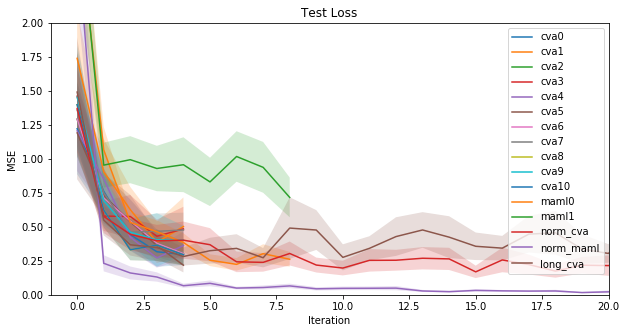

In [32]:
# plot the performance of each of these loggers as they were trained and tested
# performance vs time 
# plot each method on its own plot

for method, lgrs in loggers.items():
    for i, logger in enumerate(lgrs):
        plt.plot(np.arange(len(logger.test_loss)), logger.test_loss, label=method+str(i))
        plt.fill_between(np.arange(len(logger.test_loss)), logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=0.2)

for method, logger in normal_loggers.items():
    plt.plot(np.arange(len(logger.test_loss)), logger.test_loss, label='norm_'+method)
    plt.fill_between(np.arange(len(logger.test_loss)), logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=0.2)

for method, logger in extended_loggers.items():
    plt.plot(np.arange(len(logger.test_loss)), logger.test_loss, label='long_'+method)
    plt.fill_between(np.arange(len(logger.test_loss)), logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=0.2)    
    
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Test Loss')

plt.xlim(-1, 20)
plt.ylim(0, 2)

fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

No handles with labels found to put in legend.


4
4
4


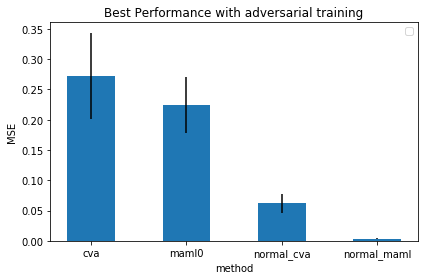

In [42]:
# what are mins of each?
mins = []
stds = []
xlbls = []

for method, logger in extended_loggers.items():
    xlbls.append(method)
    idx = np.argmin(logger.test_loss)
    mins.append(logger.test_loss[idx])
    stds.append(logger.test_conf[idx])
    
    
for method, lgrs in loggers.items():
    for i, logger in enumerate(lgrs):
        if method=='maml' and i == 0:
            xlbls.append(method+str(i))
            idx = np.argmin(logger.test_loss)
            mins.append(logger.test_loss[idx])
            stds.append(logger.test_conf[idx])

for method, logger in normal_loggers.items():
    xlbls.append('normal_'+method)
    idx = np.argmin(logger.test_loss)
    mins.append(logger.test_loss[idx])
    stds.append(logger.test_conf[idx])

print(len(mins))
print(len(stds))
print(len(xlbls))

xlabels = xlbls
x = np.arange(len(xlbls))
width = 0.5

fig, ax = plt.subplots()
rects2 = ax.bar(x, mins, width, label='', yerr=stds)
ax.set_ylabel('MSE')
ax.set_xlabel('method')
ax.set_title('Best Performance with adversarial training')
ax.set_xticks(x)
ax.set_xticklabels(xlabels)
ax.legend() 
# plt.ylim(0, 1)

fig.tight_layout()

fig = plt.gcf()
fig.set_size_inches(6,4)

plt.show() 